In [105]:
import pandas as pd

expedition_data = pd.read_csv("../datasets/EXPEDITION_DATA.csv", encoding='cp1252')
peaks_data = pd.read_csv("../datasets/PEAKS_DATA.csv")

merged_data = pd.merge(left=expedition_data, right=peaks_data, how='inner', on='PEAKID')

In [106]:
merged_data.loc[:, 'TOTALDEATHS'] = merged_data['MDEATHS'] + merged_data['HDEATHS']
merged_data.loc[:, 'SUCCESS'] =  merged_data['SUCCESS1'].astype(bool) | merged_data['SUCCESS2'].astype(bool)

In [107]:
df = merged_data[['PEAKID', 'EXPID', 'YEAR', 'SEASON', 'SEASON_FACTOR', 'HOST', 'HOST_FACTOR',
                  'ROUTE1', 'ROUTE2', 'ROUTE3', 'ROUTE4', 'TOTMEMBERS', 'TERMREASON_FACTOR', 'O2USED', 'O2NONE', 'NOHIRED',
                  'TOTALDEATHS', 'PKNAME', 'PKNAME2', 'HEIGHTM', 'HEIGHTF', 'HIMAL_FACTOR',
                  'REGION_FACTOR', 'OPEN', 'PYEAR', 'PSTATUS_FACTOR', 'PSMTDATE']]

In [117]:
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, f1_score, roc_auc_score,  roc_curve

In [110]:
features = ['PKNAME', 'O2USED', 'SEASON']
target = 'SUCCESS'

X = df[features]
y = merged_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
encoder = TargetEncoder()
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

In [114]:
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)

In [115]:
metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }

print(metrics)

{'Accuracy': 0.7231638418079096, 'Recall': 0.8709677419354839, 'Precision': 0.7659574468085106, 'F1': 0.8150943396226416}


In [121]:
y_probs = model.predict_proba(X_test_encoded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

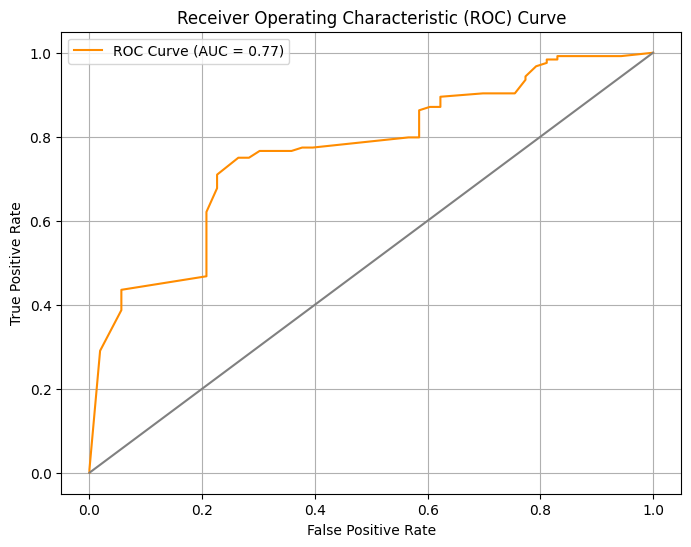

In [123]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()